In [38]:
import pickle
import pandas as pd
import cv2
from PIL import Image
import pytesseract
import numpy as np
import string
import nltk
nltk.download('punkt')
filename="documentvalidator.sav"
load_model=pickle.load(open(filename,"rb"))
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
def validator(filename):
    folder_dir = filename
    img = cv2.imread(folder_dir)    
    if img is not None:
        img1=np.array(img)
        text=pytesseract.image_to_string(img1)
    
    
    new_string = text.translate(str.maketrans('', '', string.punctuation))
    
    nltk_tokens = nltk.word_tokenize(new_string)

    newdf=pd.DataFrame(columns=["INCOME","TAX","DEPARTMENT","GOVT","OF","INDIA","PERMANENT", "NUMBER", "NAME" , "FATHERS", "BIRTH"])
    tempdict={"INCOME":0,"TAX":0,"DEPARTMENT":0,"GOVT":0,"OF":0,"INDIA":0,"PERMANENT":0, "NUMBER":0, "NAME":0 , "FATHERS":0, "BIRTH":0}
    for j in nltk_tokens:
        a=j.upper()
        if a in tempdict:
            tempdict[a]=tempdict[a]+1
    
   
    newdf = pd.concat([newdf, pd.DataFrame([tempdict])], ignore_index=True)
    print(newdf)
    result=load_model.predict(newdf)
    return result



In [119]:
filename=input("Enter Image Name-: ")

Enter Image Name-:  image.jpg


In [117]:
result=validator(filename)
print(result)
if(result==[1]):
    print("Validation Successful \nUploaded Image is of PAN Card")
else:
    print("Validation Unsuccessful")

  INCOME TAX DEPARTMENT GOVT OF INDIA PERMANENT NUMBER NAME FATHERS BIRTH
0      0   0          0    0  2     0         0      0    0       0     0
[0]
Validation Unsuccessful


ValueError: Could not save to JPEG for display

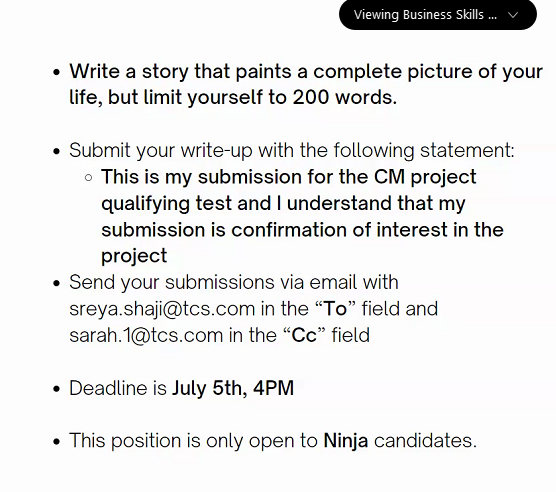

In [113]:
img = Image.open(filename)
display(img)